In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Считываем данные из csv-файла в датафрейм
df = pd.read_csv('data.csv')

In [3]:
# Выводим первые 13 значений датафрейма
df.head(13)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
# Основная информация из датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
# Сумма отсутствующих занчеий в каждом столбце 
df.isnull().sum() 

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [6]:
# Количество значений каждой категории заемщиков в столбце income_type
df.income_type.value_counts()

income_type
сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: count, dtype: int64

In [7]:
# Медианное значение total_income для каждой категории из income_type
df.groupby('income_type',as_index=False).agg({'total_income':'median'}) 

,income_type,total_income
0,безработный,131339.751676
1,в декрете,53829.130729
2,госслужащий,150447.935283
3,компаньон,172357.950966
4,пенсионер,118514.486412
5,предприниматель,499163.144947
6,сотрудник,142594.396847
7,студент,98201.625314


In [8]:
#df.total_income = df.total_income[df.total_income<1500000]

In [9]:
#Заполнение медианным значением
# В 12 строке total_income соответствует типу пенсионер 118514.486412
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median')) 

In [10]:
df.head(13)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [11]:
# количество отсутствующих значений в каждом столбце 
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

# Анализируем каждый столбец для поиска аномалий и выбросов 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='children', ylabel='Count'>

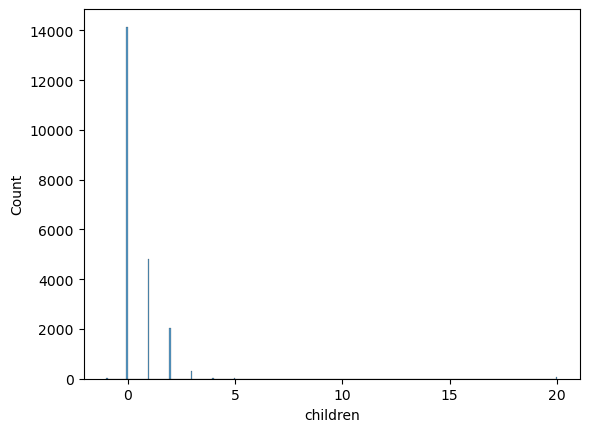

In [12]:
# график количества детей 
sns.histplot(df.children)

In [13]:
# Общее количество значений для каждой категории количества детей
df.children.value_counts()

children
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: count, dtype: int64

In [14]:
#Удаление строк с 20 детьми и меньше 0
df = df[(df['children']>=0) & (df['children']<20)]

In [15]:
# Сравнение с тем, что было 
df.children.value_counts()

children
0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: count, dtype: int64

In [16]:
# выводим датафрейм
df.head(13)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [17]:
# Количество строк и столбцов 
df.shape

(21402, 12)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='days_employed', ylabel='Count'>

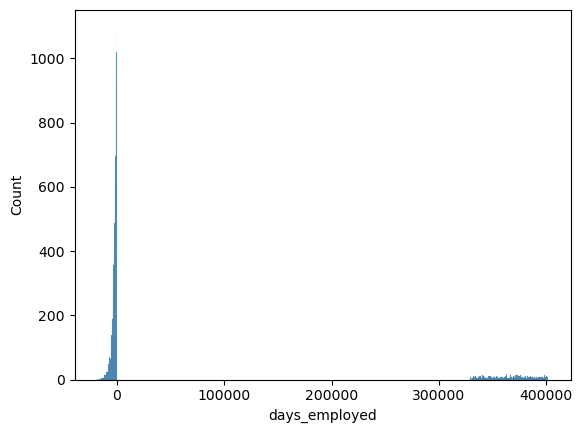

In [18]:
#Аномальные значения между 300000 - 400000
sns.histplot(df.days_employed) 

In [19]:
#Модуль и округление для столбца days_employed 
df['days_employed'] =abs(df['days_employed']).round()
df.head(13)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8438.0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4025.0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4125.0,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.0,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,153.0,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6930.0,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2189.0,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [20]:
# Количество отсутствующих значеинй во всем датафрейме
df.isnull().sum()

children               0
days_employed       2162
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

In [21]:
# Данные days_employed о пенсионерах и безработных попадают в аномальный диапазон => будут удалены 
df.groupby('income_type').agg({'days_employed':['median','mean','max','min']})

days_employed                                   
                       median           mean       max       min
income_type                                                     
безработный          366413.5  366413.500000  395303.0  337524.0
в декрете              3297.0    3297.000000    3297.0    3297.0
госслужащий            2689.0    3403.545524   15193.0      40.0
компаньон              1556.0    2118.249670   17616.0      30.0
пенсионер            365287.0  365025.089239  401755.0  328729.0
предприниматель         521.0     521.000000     521.0     521.0
сотрудник              1572.0    2323.655041   18389.0      24.0
студент                 579.0     579.000000     579.0     579.0

In [22]:
# Удаление аномальных занчений days_employed 
df = df.drop(df[df.days_employed>20700].index) #Нормальными считаем 20700 дней = 60 лет
df.head(13)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8438.0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4025.0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4125.0,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
5,0,926.0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.0,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,153.0,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6930.0,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2189.0,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи
10,2,4171.0,36,высшее,0,женат / замужем,0,M,компаньон,0,113943.491460,покупка недвижимости


In [23]:
# Выводим отсутствующие значения 
df.isnull().sum()

children               0
days_employed       2162
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='days_employed', ylabel='Count'>

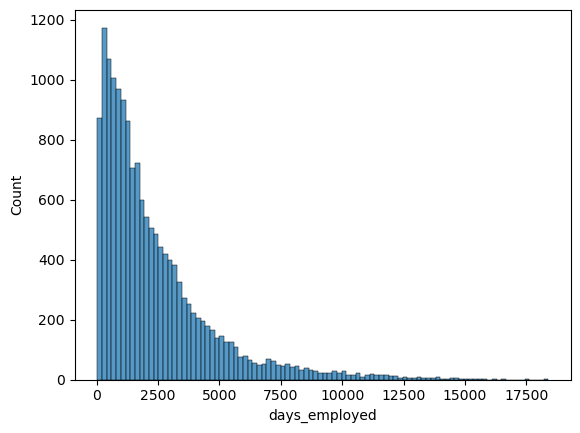

In [24]:
# График days_employed 
days_employed_fig = sns.histplot(df.days_employed) 
days_employed_fig.figure.savefig("days_employed_fig.png") 
days_employed_fig

In [25]:
# Медианные значения days_employed для каждой категории в income_type
df.groupby('income_type',as_index=False).agg({'days_employed':'median'})

,income_type,days_employed
0,в декрете,3297.0
1,госслужащий,2689.0
2,компаньон,1556.0
3,пенсионер,NaN
4,предприниматель,521.0
5,сотрудник,1572.0
6,студент,579.0


In [26]:
# Заполнение медианным значением пропуски в days_employed 
df['days_employed'] = df['days_employed'].fillna(df.groupby('income_type')['days_employed'].transform('median')) 

In [27]:
# Выводим датафрейм 
df.head(13)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8438.0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4025.0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4125.0,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
5,0,926.0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.0,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,153.0,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6930.0,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2189.0,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи
10,2,4171.0,36,высшее,0,женат / замужем,0,M,компаньон,0,113943.491460,покупка недвижимости


In [28]:
# Выводим общее количество элементов для каждой категории income_type
df.income_type.value_counts()

income_type
сотрудник          11050
компаньон           5054
госслужащий         1453
пенсионер            410
предприниматель        2
студент                1
в декрете              1
Name: count, dtype: int64

In [29]:
# После удаления строчек, соответствующих days_employed>20700, у 410 заемщиков отсутствуют значения в выбранном диапазоне 
df.isnull().sum()

children              0
days_employed       410
dob_years             0
education             0
education_id          0
family_status         0
family_status_id      0
gender                0
income_type           0
debt                  0
total_income          0
purpose               0
dtype: int64

In [30]:
#Удаление отсутствующих знчений 
df = df.dropna(subset=['days_employed'])

In [31]:
# Выводим количество строк и столбцов датафрейма
df.shape

(17561, 12)

In [32]:
#Смотрим количество отсутствующих значений 
df.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

# dob_years

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='dob_years', ylabel='Count'>

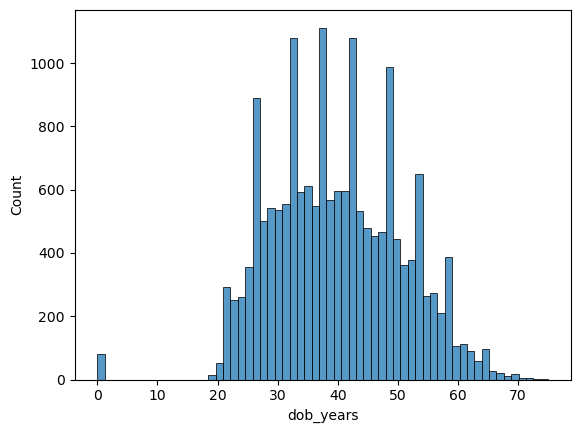

In [33]:
# График dob_years заемщиков для поиска выбросов 
sns.histplot(df.dob_years)

In [34]:
# оставляем данные, которые соответствуют условию "Возарст клиента > 0 "
df = df[(df['dob_years']>0)] 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='dob_years', ylabel='Count'>

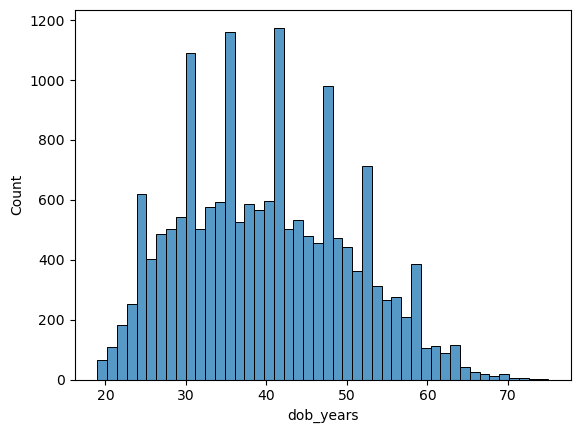

In [35]:
# Строим график dob_years для сравнения 
sns.histplot(df.dob_years)

In [36]:
# Размер датафрейма
df.shape

(17481, 12)

# education

In [38]:
# Выводим количество заемщиков с разным уровнем образования 
df.education.value_counts()

education
среднее                10815
высшее                  4148
неоконченное высшее      628
СРЕДНЕЕ                  613
Среднее                  537
Высшее                   244
ВЫСШЕЕ                   239
начальное                163
Неоконченное высшее       43
НЕОКОНЧЕННОЕ ВЫСШЕЕ       27
НАЧАЛЬНОЕ                 10
Начальное                 10
ученая степень             3
УЧЕНАЯ СТЕПЕНЬ             1
Name: count, dtype: int64

In [39]:
#Приведение к нижнему регистру категорий в разделе "education"
df['education'] = df.education.str.lower()

In [40]:
#Выводим после приведения к нижнему регистру раздел "education"
df.education.value_counts()

education
среднее                11965
высшее                  4631
неоконченное высшее      698
начальное                183
ученая степень             4
Name: count, dtype: int64

In [41]:
df.education_id.value_counts() #Аномалий в education_id нет

education_id
1    11965
0     4631
2      698
3      183
4        4
Name: count, dtype: int64

# family_status

[Text(0.5, 0, 'counts'), Text(0, 0.5, 'family_status')]

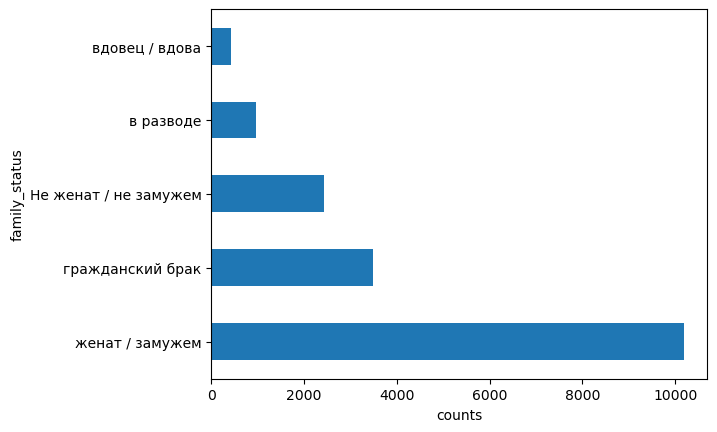

In [42]:
# Аномалий в family_status нет. Выводим количество заемщиков для каждой категории family_status
ax = df.family_status.value_counts().plot(kind='barh')
ax.set(xlabel='counts', ylabel='family_status')


# gender

[Text(0.5, 0, 'counts'), Text(0, 0.5, 'Gender')]

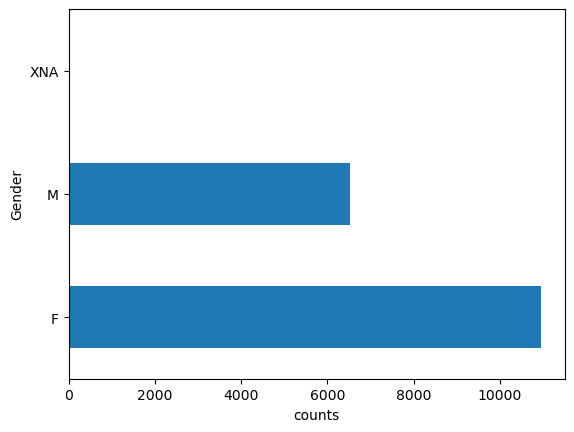

In [43]:
gender_ax = df.gender.value_counts().plot(kind='barh')
gender_ax.set(xlabel='counts', ylabel='Gender')
# смотрим, сколько мужчин и женщин среди заемщиков 

In [44]:
# Аномалия в gender XNA. Удаляем        
df.gender.value_counts()

gender
F      10958
M       6522
XNA        1
Name: count, dtype: int64

In [102]:
# Удаляем аномальное значение
df.drop(df.loc[df['gender'] == 'XNA'].index, inplace=True)

In [46]:
# Выводим таблицу после удаления аномальных значений 
df.gender.value_counts()

gender
F    10958
M     6522
Name: count, dtype: int64

# income_type

[Text(0.5, 0, 'counts'), Text(0, 0.5, 'income_type')]

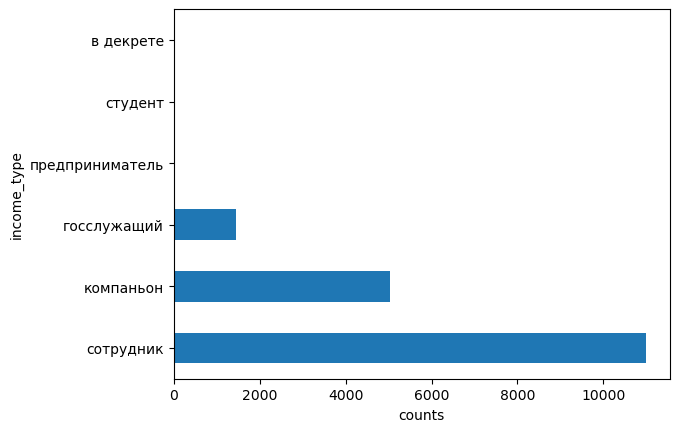

In [47]:
# Выводим количество заемщиков для каждой категории в столбце income_type для поиска выбросов
income_type_ax = df.income_type.value_counts().plot(kind='barh')
income_type_ax.set(xlabel='counts', ylabel='income_type')

In [48]:
#Аномалий в income_type нет
df.income_type.value_counts()

income_type
сотрудник          10996
компаньон           5033
госслужащий         1447
предприниматель        2
студент                1
в декрете              1
Name: count, dtype: int64

# Debt

In [104]:
# Выводим количество заемщиков с долгами и без
df.debt.value_counts()

debt
0    15928
1     1508
Name: count, dtype: int64

# total_income

In [51]:
#sns.histplot(df.total_income)

In [52]:
#df.total_income = df.total_income[df.total_income<500000]

In [53]:
#sns.histplot(df.total_income)

In [54]:
df.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

# Dublicates

In [55]:
df.duplicated().value_counts() #44 дубликатов


False    17436
True        44
Name: count, dtype: int64

In [105]:
# Выводим дубликаты из датафрейма 
df[df.duplicated(keep=False)]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
41,0,2689.0,50,среднее,1,женат / замужем,0,F,госслужащий,0,150447.935283,операции с автомобилем,C
90,2,1572.0,35,высшее,0,женат / замужем,0,F,сотрудник,0,142594.396847,операции с недвижимостью,C
97,0,1572.0,47,высшее,0,женат / замужем,0,F,сотрудник,0,142594.396847,получение образования,C
120,0,1572.0,46,среднее,1,женат / замужем,0,F,сотрудник,0,142594.396847,получение образования,C
135,0,1556.0,27,среднее,1,женат / замужем,0,M,компаньон,0,172357.950966,операции с недвижимостью,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21206,1,1556.0,34,среднее,1,женат / замужем,0,M,компаньон,0,172357.950966,операции с недвижимостью,C
21211,0,1572.0,48,среднее,1,женат / замужем,0,F,сотрудник,0,142594.396847,операции с автомобилем,C
21364,0,1572.0,50,среднее,1,женат / замужем,0,M,сотрудник,0,142594.396847,операции с недвижимостью,C
21391,0,1556.0,52,среднее,1,женат / замужем,0,F,компаньон,0,172357.950966,операции с недвижимостью,C


In [57]:
#  выводим размер датафрейма  
df.shape

(17480, 12)

In [58]:
#Удаляем дубикаты
df = df.drop_duplicates() 
df.shape

(17436, 12)

In [59]:
#  проверка наличия дубликатов 
df.duplicated().value_counts()


False    17436
Name: count, dtype: int64

# total_income_category  column

In [60]:
# Условия для нового столбца total_income_category 
conditions = [
    df['total_income'] < 30000,
    (df['total_income'] >= 30001) & (df['total_income'] <= 50000 ),
    (df['total_income'] >= 50001) & (df['total_income'] <= 200000 ),
    (df['total_income'] >= 200001) & (df['total_income'] <= 1000000),
    df['total_income'] > 1000001] 

In [61]:
# Новые категории, которые будут соответствовать условиям выше 
categories  = ['E','D','C','B','A']

In [62]:
# Создание нового столбца 
df['total_income_category'] = np.select(conditions, categories, default='Unknown')

In [63]:
#  выводим датафрейм с новым столбцом   
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8438.0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,B
1,1,4025.0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,C
2,0,5623.0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,C
3,3,4125.0,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,B
5,0,926.0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,B


In [64]:
#  Проверка неизвестной категории в новом столбце  total_income_category. Видим, что все категории успешно распределены 
df[df.total_income_category=='Unknown']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category


# replacing pusrpose

In [65]:
#  Выводим сумму значений для каждой цели кредита. 
df.purpose.value_counts()

purpose
свадьба                                   647
на проведение свадьбы                     618
сыграть свадьбу                           614
операции с недвижимостью                  545
покупка коммерческой недвижимости         541
операции с жильем                         534
покупка жилья для сдачи                   532
операции с коммерческой недвижимостью     527
покупка своего жилья                      526
жилье                                     526
недвижимость                              523
покупка жилья                             516
строительство недвижимости                514
покупка жилья для семьи                   514
строительство собственной недвижимости    513
операции со своей недвижимостью           508
покупка жилой недвижимости                506
покупка недвижимости                      505
строительство жилой недвижимости          501
ремонт жилью                              499
на покупку своего автомобиля              421
заняться высшим образовани

In [66]:
# Присвоене категории по содержанию текста в столбце purpose
df.loc[df['purpose'].str.contains('свад',case=False), 'purpose'] = 'проведение свадьбы'
df.loc[df['purpose'].str.contains('недвиж|жиль',case=False, regex=True), 'purpose'] = 'операции с недвижимостью'
df.loc[df['purpose'].str.contains('авто|маш',case=False, regex=True), 'purpose'] = 'операции с автомобилем'
df.loc[df['purpose'].str.contains('образ',case=False, regex=True), 'purpose'] = 'получение образования'


In [67]:
#  Выводим сумму значений с новыми категориями в столбце purpose
df.purpose.value_counts()

purpose
операции с недвижимостью    8830
операции с автомобилем      3470
получение образования       3257
проведение свадьбы          1879
Name: count, dtype: int64

In [68]:
#  Выводим датафрейм 
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8438.0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,операции с недвижимостью,B
1,1,4025.0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,операции с автомобилем,C
2,0,5623.0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,операции с недвижимостью,C
3,3,4125.0,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,получение образования,B
5,0,926.0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,операции с недвижимостью,B


In [70]:
df.shape

(17436, 13)

# Шаг 3. Исследовательский анализ и визуализация. 

<Axes: xlabel='children', ylabel='total_income'>

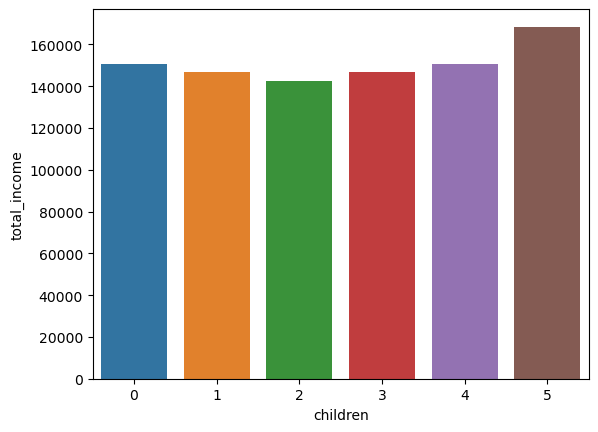

In [71]:
#зависимость между количеством детей и уровнем дохода
children_total_income = df.groupby('children',as_index=False).agg({'total_income':'median'})
sns.barplot(data=children_total_income, x='children',y='total_income')

#Наблюдается незначительная зависимость между уровнем дохода и количеством детей. 
#Наименьшим доходом обладают люди с двумя детьми, наибольшим – с пятью.

In [72]:
#зависимость между количеством детей и возвратом кредита в срок
df.debt.value_counts()

debt
0    15928
1     1508
Name: count, dtype: int64

In [73]:
#  Создание сводной таблицы  категория «количество детей» (число) / всего кредитополучателей  
kids_debt=df.children.value_counts().to_frame().reset_index().rename({'count':'families'},axis=1)
kids_debt

,children,families
0,0,10530
1,1,4516
2,2,2019
3,3,322
4,4,40
5,5,9


In [74]:
#  Выводим таблицу зависимости наличия или отсутствия долга у кредитополучателей с различным количеством детей 
df.groupby(['children','debt'],as_index=True).agg({'debt':'count'})

debt
children debt      
0        0     9669
         1      861
1        0     4090
         1      426
2        0     1828
         1      191
3        0      296
         1       26
4        0       36
         1        4
5        0        9

In [75]:
# Формируем предварительную таблицу, состоящую из  должников по каждой категории количества детей 
debt_df = df.groupby(['debt','children'],as_index=True).agg({'debt':'count'})\
    .rename({'debt':'clients_with_debt'},axis=1)\
    .reset_index()\
    .sort_values('debt',ascending=False)\
    .groupby('children')\
    .head(1)
debt_df

,debt,children,clients_with_debt
6,1,0,861
7,1,1,426
8,1,2,191
9,1,3,26
10,1,4,4
5,0,5,9


In [76]:
# Добавляем к таблице kids_debt столбец с информацией о количестве должников, который выше получили в предыдущем пункте 
kids_debt = kids_debt.merge(debt_df, how='outer', on='children')
kids_debt

,children,families,debt,clients_with_debt
0,0,10530,1,861
1,1,4516,1,426
2,2,2019,1,191
3,3,322,1,26
4,4,40,1,4
5,5,9,0,9


In [77]:
#Из предыдущих шагов обработки мы видим, что у кредитополучателей с 5 детьми нет долгов. Поэтому в 5-ой строчке поменяем 0 в столбце "debt" на 1 (долг есть), который равен 0, т.е. количество должников =0
kids_debt.debt=1
kids_debt=kids_debt.replace({kids_debt.iloc[5]['clients_with_debt']:0})

In [78]:
kids_debt

,children,families,debt,clients_with_debt
0,0,10530,1,861
1,1,4516,1,426
2,2,2019,1,191
3,3,322,1,26
4,4,40,1,4
5,5,0,1,0


In [79]:
# Добавляем новый столбец, содержащий долю должников 
kids_debt['debtors_share'] = kids_debt.clients_with_debt/kids_debt.families

In [80]:
kids_debt

,children,families,debt,clients_with_debt,debtors_share
0,0,10530,1,861,0.081766
1,1,4516,1,426,0.094331
2,2,2019,1,191,0.094601
3,3,322,1,26,0.080745
4,4,40,1,4,0.100000
5,5,0,1,0,NaN


In [81]:
# меняем nan на 0
kids_debt = kids_debt.fillna(0)

In [82]:
#сводная таблица
kids_debt

,children,families,debt,clients_with_debt,debtors_share
0,0,10530,1,861,0.081766
1,1,4516,1,426,0.094331
2,2,2019,1,191,0.094601
3,3,322,1,26,0.080745
4,4,40,1,4,0.100000
5,5,0,1,0,0.000000


<Axes: xlabel='children', ylabel='debtors_share'>

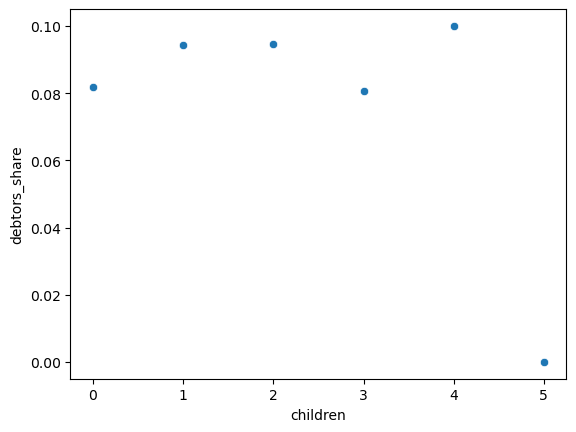

In [83]:
# График зависимости доли заемщиков, не вернувших кредит, от количества детей 
sns.scatterplot(data=kids_debt, x='children',y='debtors_share')

# ДОП


In [106]:
#Присвоене новых категорий по числу детей в столбце children

kids_debt['family_type'] = kids_debt.loc[kids_debt['children'].astype(str).str.contains('0',case=False), 'children'] = 'бездетные'
kids_debt['family_type'] = kids_debt.loc[kids_debt['children'].astype(str).str.contains('1|2',case=False), 'children'] = 'малодетные'
kids_debt['family_type'] = kids_debt.loc[kids_debt['children'].astype(str).str.contains('3|4|5',case=False), 'children'] = 'многодетные'
kids_debt

C:\Users\lboro\AppData\Local\Temp\ipykernel_15080\3726303140.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'бездетные' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  kids_debt['family_type'] = kids_debt.loc[kids_debt['children'].astype(str).str.contains('0',case=False), 'children'] = 'бездетные'


,children,families,debt,clients_with_debt,debtors_share,family_type,%
0,бездетные,10530,1,861,0.081766,многодетные,8.176638
1,малодетные,4516,1,426,0.094331,многодетные,9.433127
2,малодетные,2019,1,191,0.094601,многодетные,9.460129
3,многодетные,322,1,26,0.080745,многодетные,8.074534
4,многодетные,40,1,4,0.100000,многодетные,10.000000
5,многодетные,0,1,0,0.000000,многодетные,0.000000


In [107]:
# Переносим категории из столбца "children" в столбец "family_type". 
# Возвращаем числовые значения в столбец "children"
kids_debt.family_type=kids_debt.children
kids_debt.children = range(0,6)

In [108]:
kids_debt

,children,families,debt,clients_with_debt,debtors_share,family_type,%
0,0,10530,1,861,0.081766,бездетные,8.176638
1,1,4516,1,426,0.094331,малодетные,9.433127
2,2,2019,1,191,0.094601,малодетные,9.460129
3,3,322,1,26,0.080745,многодетные,8.074534
4,4,40,1,4,0.100000,многодетные,10.000000
5,5,0,1,0,0.000000,многодетные,0.000000


In [88]:
#Значение в столбце '%' - это доля должников в каждой категории  
kids_debt['%'] = kids_debt.debtors_share*100
kids_debt

,children,families,debt,clients_with_debt,debtors_share,family_type,%
0,0,10530,1,861,0.081766,бездетные,8.176638
1,1,4516,1,426,0.094331,малодетные,9.433127
2,2,2019,1,191,0.094601,малодетные,9.460129
3,3,322,1,26,0.080745,многодетные,8.074534
4,4,40,1,4,0.100000,многодетные,10.000000
5,5,0,1,0,0.000000,многодетные,0.000000


In [89]:
kids_debt.groupby('family_type',as_index=False).agg({'%':'mean'})
#Можно заметить, что количество должников больше среди семей, в которых 1 или 2 ребенка.

,family_type,%
0,бездетные,8.176638
1,малодетные,9.446628
2,многодетные,6.024845


In [90]:
#зависимость между семейным положением и возвратом кредита в срок
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8438.0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,операции с недвижимостью,B
1,1,4025.0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,операции с автомобилем,C
2,0,5623.0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,операции с недвижимостью,C
3,3,4125.0,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,получение образования,B
5,0,926.0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,операции с недвижимостью,B


In [91]:
# Количество должников по каждой категории из family_status
status_debt=df.groupby('family_status',as_index=False).agg({'debt':'sum'}).sort_values('debt',ascending=True)
status_debt

,family_status,debt
2,вдовец / вдова,26
1,в разводе,71
0,Не женат / не замужем,256
3,гражданский брак,347
4,женат / замужем,808


<Axes: xlabel='debt', ylabel='family_status'>

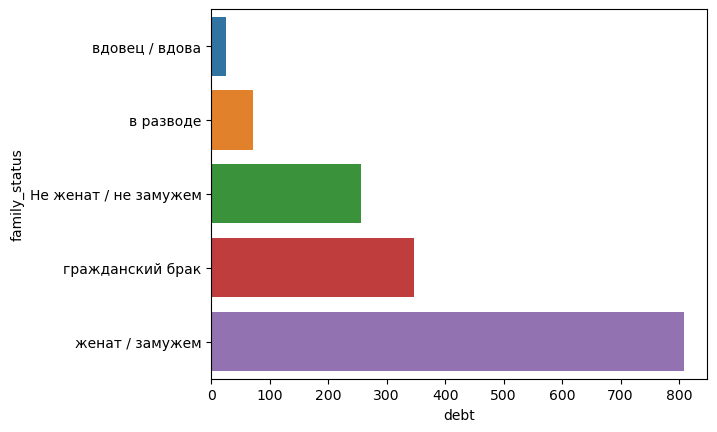

In [92]:
sns.barplot(data=status_debt,x='debt',y='family_status')
#Чаще всего не возвращают в срок кредит люди, состоящие в гражданском и/или официальном браке. 
#Меньше всего долгов по кредитам имеют вдовцы/вдовы и люди в разводе.

In [93]:
# Таблица, демонстрирующая зависимость между уровнем дохода и количеством должников 
income_debt=df.groupby('total_income_category',as_index=False).agg({'debt':'sum'}).sort_values('total_income_category',ascending=True)
income_debt

,total_income_category,debt
0,A,2
1,B,322
2,C,1170
3,D,14
4,E,0


<Axes: xlabel='debt', ylabel='total_income_category'>

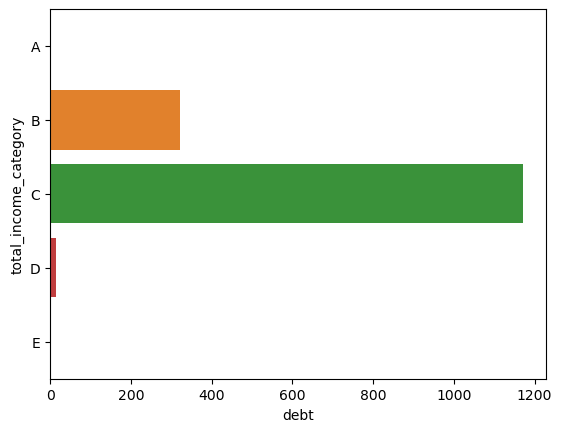

In [94]:
sns.barplot(data=income_debt,x='debt',y='total_income_category')
#Самое большое количество невозвращенных долгов  у людей с уровнем дохода 50001-200000.

In [109]:
# Таблица, демонстрирующая зависимость между уровнем образования и уровнем дохода 
income_edu = df.groupby('education',as_index=False).agg({'total_income':'median'}).sort_values('total_income',ascending=False)
income_edu

,education,total_income
0,высшее,172357.950966
2,неоконченное высшее,159190.392454
4,ученая степень,157259.898555
3,среднее,142594.396847
1,начальное,134012.003567


<Axes: xlabel='total_income', ylabel='education'>

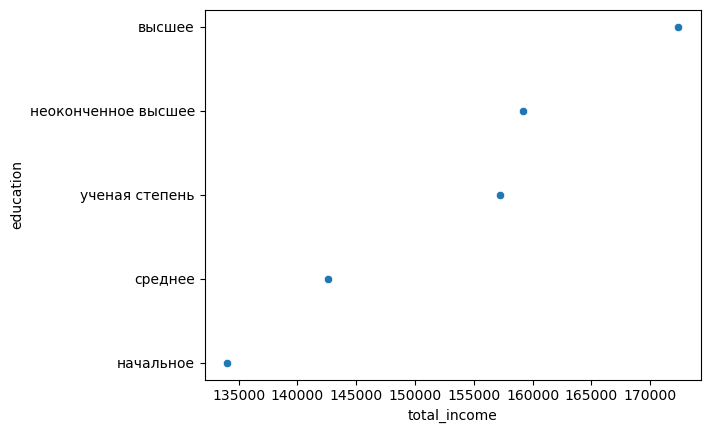

In [96]:
#у заемщиков с высшим образованием больший уровень дохода, 
#а у заемщиков в категории "начальное образование" меньший доход.
sns.scatterplot(data=income_edu,x='total_income',y='education')

In [97]:
# Таблица, демонстрирующая количество должников с разным уровнем образования
edu_debt=df.groupby('education',as_index=False).agg({'debt':'sum'}).sort_values('debt',ascending=True)
edu_debt

,education,debt
4,ученая степень,0
1,начальное,28
2,неоконченное высшее,67
0,высшее,249
3,среднее,1164


[Text(0.5, 0, 'debtors'), Text(0, 0.5, 'Education type')]

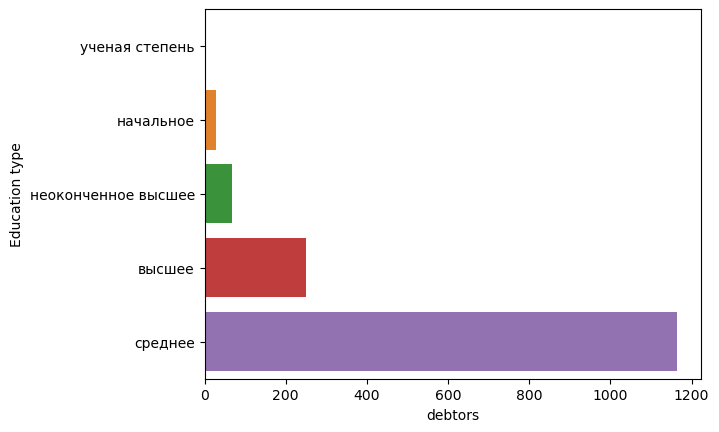

In [98]:
# Наибольшая доля должников по кредитам - люди со средним образованием.
edu_debt_fig = sns.barplot(data=edu_debt,x='debt',y='education')
edu_debt_fig.set(xlabel='debtors', ylabel='Education type')


In [99]:
# Таблица, демонстрирующая количество должников с разными целями кредита
purpose_debt = df.groupby('purpose',as_index=False).agg({'debt':'sum'})
purpose_debt

,purpose,debt
0,операции с автомобилем,347
1,операции с недвижимостью,684
2,получение образования,321
3,проведение свадьбы,156


[Text(0.5, 0, 'Debtors'), Text(0, 0.5, 'Purpose')]

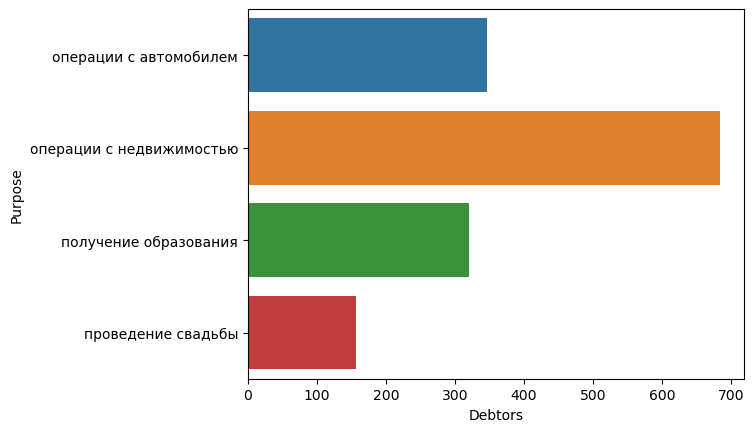

In [100]:
purpose_debt_fig = sns.barplot(data=purpose_debt,x='debt',y='purpose')
purpose_debt_fig.set(xlabel='Debtors', ylabel='Purpose')
#Большее число невозвращенных кредитов относятся к операциям, связанным с недвижимостью. 
#Примерно одинаковое число долгов приходится на кредиты для операций с автомобилем и для получения образования,
#и меньше всего – на кредиты для проведения свадеб.

# Вывод

В ходе выполнения исследования был проведен анализ о влияние различных факторов на способность клиентов погасить кредит вовремя, который необходим для системы финансового скрининга.
В ходе предобработки данных, необходимой для их корректного анализа, были: 
1)  найдены пустые строки в числовых разделах данных, которые были заполнены медианными значениями;
2)  найдены и удалены аномальные значения и выбросы;
3)  устранены неявные дубликаты;
4)  заемщики разделены на основные категории по уровню дохода;
5)   цели кредита объединены в 4 категории;
6)  сформированы сводные таблицы, демонстрирующие зависимости между различными параметрами заемщиков.
В результате были замечены следующие особенности:
1.  Явной зависимости между уровнем дохода и количеством детей в семье не было обнаружено, но при этом доход семей с пятью детьми выше,чем семей с другим количеством детей, а в семье с двумя детьми наименьший доход. 
2.  Наличие долга слабо зависит от количества детей. Самыми надежными заемщиками являются семьи с 3-мя и более детьми. 
3.  Была обнаружена явная зависимость наличия долга от семейного положения. Чаще всего не возвращают кредит люди, состоящие в гражданском или официальном браке. Почти всегда возвращают кредит вдовы или вдовцы.
4.  Если говорить о зависимости уровня дохода и количества должников, то самыми ненадежными заемщиками являются граждане с доходом в диапазоне 50001–200000.
5.  Есть явная зависимость между уровнем образования и доходом заемщиков и их способностью вернуть кредит. Чаще всего заемщики со средним образованием становятся должниками.
6.  Зависимость количества должников от цели кредита также явно прослеживается. Чаще всего задолжности по кредитам возникают у тех, кто попросил их для совершения сделок, связанных с недвижимостью. Реже всего кредит не возвращают те, кто взял его для проведения свадеб. 

Таким образом, в результате анализа данных можно сказать, что самыми надежными заемщиками являются граждане с высшим образованием и уровнем дохода в диапазоне 30000 - 50000 рублей и больше 1000000. Самой частой целью кредита является недвижимость. 

Общие рекомендации по сбору и подготовки данных для обработки.
 
В ходе предобработки данных были обнаружено достаточно много особенностей (пропусков и аномальных значений), которые могли существенно повлиять на результат итогового анализа. 
Чаще всего такие ситуации наблюдались в категориях «количество детей», «общий трудовой стаж в днях», «уровень дохода» и «уровень образования». Для корректного сбора информации в этих категориях рекомендуется использовать готовые ответы, которые содержать диапазон значений, т.е. например, для детей категории «бездетные», «малодетные» и «многодетные» и т.д. для других категорий сделать аналогичным образом. Эта стандартизация значительно ускорит обработку и анализ данных.
